# QF 625 Introduction to Programming
## Lesson 04 | An Introduction to pandas Part 3 (featuring `bokeh` & `seaborn`) | `RE`view

> Now that you are sufficinetly familiar with the basics of data cleaning and analysis in pandas, we're going to take it up a notch. 

> Previously, the datasets were in relatively clean and straightforward formats. 

> However, in many cases, the data you analyze can be extremely messy and difficult to manage.

> That's why we're going to practice with a more unweildy. 

> You'll notice that it's quite a big file – about 1.7 million rows! 

> These are reports from accidents in New Jersey between 2008 and 2013 from the New Jersey Department of Transportation. 

> The data was scraped from [PDFs of crash reports](http://www.state.nj.us/transportation/refdata/accident/) filled out by clerk.

### Import pandas and let's load in our new and very messy data

In [1]:
import pandas as pd

In [3]:
accidents = pd.read_csv("accidents.csv", encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


> You may notice that you get this warning.

`"DtypeWarning: Columns (6,17) have mixed types. Specify dtype option on import or set low_memory=False. interactivity=interactivity, compiler=compiler, result=result)"`

> This dtype error happens when when a column has both strings and integer values. 

> You can ignore this for now because we'll fix it soon. Open up the first few rows of our dataframe.

In [4]:
accidents.head()

,case code,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Police Dept Code,Police Department,Police Station,Total Killed,...,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.
0,2008010108-026816,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,1,ATLANTIC CITY,AIU,0,...,,,,50,,39.41158,74.49162,N,NONE ...,384
1,2008010108-163190,ATLANTIC,ABSECON CITY,12/19/08,F,1114,1,ATLANTIC CITY,TRAFFIC,0,...,,,,50,,39.39231,74.48952,N,NONE ...,739
2,2008010108-24779,ATLANTIC,ABSECON CITY,11/25/08,TU,345,99,NJ TRANSIT P.D.,ATLANTIC CITY,0,...,,,,10,25,,,N,? ...,53
3,2008010108-3901,ATLANTIC,ABSECON CITY,3/31/08,M,105,1,EAST WINDSOR,TRAFFIC UNIT,0,...,,,,0,,,,N,NONE ...,551
4,2008010108-5016,ATLANTIC,ABSECON CITY,1/25/08,F,942,1,EGG HARBOR TWP,HQ,0,...,,,,50,40,39.43036,74.52469,N,NONE ...,1571


> Let's found out what we're working with, and get the column headers for all of the columns.

In [5]:
accidents.columns

Index(['case code', ' County Name', ' Municipality Name', ' Crash Date',
       ' Crash Day Of Week', ' Crash Time', ' Police Dept Code',
       ' Police Department', ' Police Station', ' Total Killed',
       ' Total Injured', ' Pedestrians Killed', ' Pedestrians Injured',
       ' Severity', ' Intersection', ' Alcohol Involved', ' HazMat Involved',
       ' Crash Type Code', ' Total Vehicles Involved', ' Crash Location',
       ' Location Direction', ' Route', ' Route Suffix',
       ' SRI (Std Rte Identifier)', ' MilePost  ', ' Road System',
       ' Road Character', ' Road Surface Type', ' Surface Condition',
       ' Light Condition', ' Environmental Condition', ' Road Divided By',
       ' Temporary Traffic Control Zone', ' Distance To Cross Street',
       ' Unit Of Measurement', ' Directn From Cross Street',
       ' Cross Street Name', ' Is Ramp', ' Ramp To/From Route Name',
       ' Ramp To/From Route Direction', ' Posted Speed',
       ' Posted Speed Cross Street', ' Latitud

> Bummer. There's our first problem. Notice that there's a leading space in every column header. We should take it out.

In [6]:
accidents.rename(columns = lambda x: x.strip(), inplace = True) # Address empty spaces on column headers

> Remember where we renamed the columns in our dataframe previously? 

> This time, we're using the same rename function to do take out all of the leading spaces using `strip()`. 

> Pythonistas will notice that we're using the `lambda python` to apply `strip()` to every single column header.

In [7]:
accidents.columns

Index(['case code', 'County Name', 'Municipality Name', 'Crash Date',
       'Crash Day Of Week', 'Crash Time', 'Police Dept Code',
       'Police Department', 'Police Station', 'Total Killed', 'Total Injured',
       'Pedestrians Killed', 'Pedestrians Injured', 'Severity', 'Intersection',
       'Alcohol Involved', 'HazMat Involved', 'Crash Type Code',
       'Total Vehicles Involved', 'Crash Location', 'Location Direction',
       'Route', 'Route Suffix', 'SRI (Std Rte Identifier)', 'MilePost',
       'Road System', 'Road Character', 'Road Surface Type',
       'Surface Condition', 'Light Condition', 'Environmental Condition',
       'Road Divided By', 'Temporary Traffic Control Zone',
       'Distance To Cross Street', 'Unit Of Measurement',
       'Directn From Cross Street', 'Cross Street Name', 'Is Ramp',
       'Ramp To/From Route Name', 'Ramp To/From Route Direction',
       'Posted Speed', 'Posted Speed Cross Street', 'Latitude', 'Longitude',
       'Cell Phone In Use Flag', '

> Good job :)

> Let's describe() the dataframe.

In [8]:
accidents.describe()

,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Road System,Posted Speed
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.965525e-03,3.119510e-01,4.854207e-04,1.735117e-02,1.875997e+00,5.199488e+00,3.120711e+01
std,4.694568e-02,7.015340e-01,2.211335e-02,1.344480e-01,5.416507e-01,2.491480e+00,1.790289e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.500000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.500000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,4.500000e+01
max,5.000000e+00,4.200000e+01,2.000000e+00,1.000000e+01,2.000000e+01,1.000000e+01,9.900000e+01


> But let's see if we could describe() a column. Let's use the describe() function for the `County Name` column header.

In [9]:
accidents["County Name"].describe()

count          1048575
unique              21
top       MIDDLESEX   
freq            115760
Name: County Name, dtype: object

> So there are 21 unique values in the `County Name` column (for the 21 counties in New Jersey). 

> We can see that the top county with the most rows is Middlesex County with 176,402 crashes. 

> What are the names of the counties in New Jersey? Let's find out by using the unique() function on our `County Name` column.

In [10]:
accidents["County Name"].unique()

array(['ATLANTIC    ', 'BERGEN      ', 'BURLINGTON  ', 'CAMDEN      ',
       'CAPE MAY    ', 'CUMBERLAND  ', 'ESSEX       ', 'GLOUCESTER  ',
       'HUDSON      ', 'HUNTERDON   ', 'MERCER      ', 'MIDDLESEX   ',
       'MONMOUTH    ', 'MORRIS      ', 'OCEAN       ', 'PASSAIC     ',
       'SALEM       ', 'SOMERSET    ', 'SUSSEX      ', 'UNION       ',
       'WARREN      '], dtype=object)

> Looks like we're going to need to strip out the spaces out of the these county values. 

> This time we'll use the map() function which will strip the white space out of every string found in the column.

In [11]:
accidents["County Name"] = accidents["County Name"].map(str.strip) # Address empty spaces on each cell.
accidents["County Name"].unique()

array(['ATLANTIC', 'BERGEN', 'BURLINGTON', 'CAMDEN', 'CAPE MAY',
       'CUMBERLAND', 'ESSEX', 'GLOUCESTER', 'HUDSON', 'HUNTERDON',
       'MERCER', 'MIDDLESEX', 'MONMOUTH', 'MORRIS', 'OCEAN', 'PASSAIC',
       'SALEM', 'SOMERSET', 'SUSSEX', 'UNION', 'WARREN'], dtype=object)

> Good :) Speaking of strings, let's fix that dtype error we got at the beginning of the exercise. 

> Type in dtypes at the end of our dataframe.

In [12]:
accidents.dtypes

case code                         object
County Name                       object
Municipality Name                 object
Crash Date                        object
Crash Day Of Week                 object
Crash Time                        object
Police Dept Code                  object
Police Department                 object
Police Station                    object
Total Killed                       int64
Total Injured                      int64
Pedestrians Killed                 int64
Pedestrians Injured                int64
Severity                          object
Intersection                      object
Alcohol Involved                  object
HazMat Involved                   object
Crash Type Code                   object
Total Vehicles Involved            int64
Crash Location                    object
Location Direction                object
Route                             object
Route Suffix                      object
SRI (Std Rte Identifier)          object
MilePost        

> This shows us the type of data type object (or dtypes) the values of every column are. Objects refer to strings. Int64 are integers. Float64 are floats.

> The warning at the beginning said it was column 6 & 17 that had mixed dtypes. If you look at your column list and count to the sixth column (Remember to count from zero!), you'll see that it's the 'Police Dept Code' column. Let's look at every unique value in that column.

In [13]:
accidents["Police Dept Code"].unique()

array(['1', '99', '  ', '2', '3', '4', 1, 99, 2, 3, 4], dtype=object)

> And there it is! As you can see, there are strings and integers mixed together in the same column.

In [14]:
accidents["Crash Type Code"].unique()

array(['2', '8', '1', '6', '11', '5', '3', '13', '7', '99', '15', '14',
       '10', '4', '12', '9', '16', '  ', '0'], dtype=object)

> Same for column 17 or the `Crash Type Code` column. 

> Let's fix that by changing every value in both columns to a string using the `astype()` function.

In [15]:
accidents["Police Dept Code"] = accidents["Police Dept Code"].astype(str)
accidents["Crash Type Code"] = accidents["Crash Type Code"].astype(str)

> We're changing it to a string because we don't need to do math with these numbers since they are codes so it's more beneficial to use them as objects. 

> If you wanted to change something to an integer or a float, you'll need to use astype(int) and astype(float) respectively.

In [16]:
accidents["Police Dept Code"]

0           1
1           1
2          99
3           1
4           1
           ..
1048570     1
1048571     1
1048572     1
1048573     1
1048574     1
Name: Police Dept Code, Length: 1048575, dtype: object

> That took care of that :)

> Let's make our dataframe a little bit more manageable by weeding out some unnecessary columns. 

> Let's also create a new dataframe called `crash_info`.

In [19]:
crash_info = accidents[["County Name", "Municipality Name", "Crash Date",
                        "Crash Day Of Week", "Crash Time", "Total Killed",
                        "Total Injured", "Pedestrians Killed", "Pedestrians Injured",
                        "Total Vehicles Involved", "Alcohol Involved", "Cell Phone In Use Flag"]]
crash_info

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag
0,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,0,0,0,0,2,N,N
1,ATLANTIC,ABSECON CITY,12/19/08,F,1114,0,0,0,0,2,N,N
2,ATLANTIC,ABSECON CITY,11/25/08,TU,345,0,0,0,0,2,N,N
3,ATLANTIC,ABSECON CITY,3/31/08,M,105,0,0,0,0,2,N,N
4,ATLANTIC,ABSECON CITY,1/25/08,F,942,0,1,0,0,2,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1611,0,0,0,0,1,N,N
1048571,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1723,0,0,0,0,2,N,N
1048572,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1821,0,0,0,0,2,N,N
1048573,MIDDLESEX,WOODBRIDGE TWP,7/22/11,F,733,0,0,0,0,2,N,N


### How many car accidents had alcohol involved?

Let's find out the unique values that come up in the column `Alcohol Involved`.

In [20]:
crash_info["Alcohol Involved"].unique()

array(['N', 'Y'], dtype=object)

> We have only two unique values in the column: `N` for `no` and `Y` for `yes`.

> Let's find out how many incidents had Ns and how many had Ys. 

> We're going to use the function value_counts() on the column 'Alcohol Involved'. 

> We're also going to put the list in a new dataframe called alcohol so that it will look nicer in our notebook.

In [21]:
alcohol = pd.DataFrame(accidents["Alcohol Involved"].value_counts())
alcohol 

,Alcohol Involved
N,1017766
Y,30809


> A lot more Ns than Ys. But just what percentage are the Ys compared to the Ns? 

> First, let's get the total number of crashes in our data frame.

In [22]:
crash_count = crash_info["Alcohol Involved"].count()

> Be careful. 

> The count() function doesn't count NAs or null values. 

> Always make sure to check for those using the `isnull()` function, followed by `sum()`

In [23]:
crash_info["Alcohol Involved"].isnull().sum()

0

> Let's create a new column named `Percent` and divide every value of the `Alcohol Involved` column by the total crashes from the `crash_count` we created above and then multiply by 100.

In [24]:
alcohol["Percent"] = (alcohol["Alcohol Involved"]/crash_count) * 100
alcohol

,Alcohol Involved,Percent
N,1017766,97.061822
Y,30809,2.938178


> Mystery solved. Only 2.9 percent.

### How many total people were killed in every county?

> Let's first use the `value_counts()` function to find out how many accidents were reported in each county.

In [25]:
crash_info["County Name"].value_counts()

MIDDLESEX     115760
ESSEX         112580
BERGEN        112521
HUDSON         78693
CAMDEN         64739
MONMOUTH       64637
UNION          59556
PASSAIC        56494
MERCER         55008
OCEAN          53104
MORRIS         49096
BURLINGTON     45010
SOMERSET       36621
ATLANTIC       35130
GLOUCESTER     31940
CUMBERLAND     18876
HUNTERDON      16441
CAPE MAY       13198
SUSSEX         12587
WARREN         11123
SALEM           5461
Name: County Name, dtype: int64

> So let's split up every incident that happened in every county by using the `groupby()`

In [26]:
crash_info.groupby("County Name")

> That looks like it did nothing, but it actually DID split up the counties into their own seperate groups. 

> We just need to know perform an action. 

> If you notice, there are columns like `Total Killed`, `Total Injured`, `Pedestrians Killed`, etc. that have numbers or integers that can be summed up. 

> Basically, we're going to add them all up by using the `sum()` function and make it into a new dataframe called `county_crash`.

In [27]:
county_crash = crash_info.groupby("County Name").sum()
county_crash

,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved
County Name,,,,,
ATLANTIC,117,13518,23,728,64147
BERGEN,101,31706,42,2136,215278
BURLINGTON,161,15285,28,398,81956
CAMDEN,173,24909,45,1102,122872
CAPE MAY,32,4206,1,172,23761
CUMBERLAND,99,7296,9,226,33571
ESSEX,170,39627,63,3511,216820
GLOUCESTER,102,11442,17,342,57627
HUDSON,87,19842,32,2675,154819


> Well, that's grim. 

> Let's just take out the `Total Killed` column using iloc which asks what data we should slice by putting an integer based on its position. 

> The first value represents the rows and is separated by comma from the second value which represents the columns. 

> Therefore, if we want all of the rows, we put a colon. We then seperate using a comma. Then, because `Total Killed` is the first column, we can slice it by putting in a zero. 

> We will also sort it by using sort_values and adding the option `ascending=False` because we want the values to descend. 

> Let's make it into a new dataframe called `county_death`.

In [29]:
county_death = crash_info.groupby("County Name").sum().iloc[ : , 0].sort_values(ascending = False)

> What would be the `type` of `county_death`?

In [30]:
type(county_death)

pandas.core.series.Series

Let's make `county_death` into a dataframe.

In [31]:
pd.DataFrame(county_death)

,Total Killed
County Name,
MIDDLESEX,182
CAMDEN,173
ESSEX,170
BURLINGTON,161
OCEAN,160
MONMOUTH,131
ATLANTIC,117
UNION,110
GLOUCESTER,102


### What about dates?

In [32]:
crash_info

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag
0,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,0,0,0,0,2,N,N
1,ATLANTIC,ABSECON CITY,12/19/08,F,1114,0,0,0,0,2,N,N
2,ATLANTIC,ABSECON CITY,11/25/08,TU,345,0,0,0,0,2,N,N
3,ATLANTIC,ABSECON CITY,3/31/08,M,105,0,0,0,0,2,N,N
4,ATLANTIC,ABSECON CITY,1/25/08,F,942,0,1,0,0,2,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1611,0,0,0,0,1,N,N
1048571,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1723,0,0,0,0,2,N,N
1048572,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1821,0,0,0,0,2,N,N
1048573,MIDDLESEX,WOODBRIDGE TWP,7/22/11,F,733,0,0,0,0,2,N,N


> You may have noticed that the dates on the 'Crash Date' are strings and not Python date objects. 

> This will be inconvenient because if you sort them you'll get '01/01/2008, 01/01/2009, 01/01/2010' etc. 

> We want them to sort by date correctly, and in order to do that, we need to turn them into the Python date format.

> ***We will need to `import datetime` first.*** 

In [33]:
from datetime import datetime

> Then we will use `apply()` along with the lambda function to turn every string in that column into the format "%m/%d/%Y".

In [34]:
crash_info["Crash Date"]= crash_info["Crash Date"].apply(lambda x: datetime.strptime(x, "%m/%d/%y").date())

<ipython-input-34-2ec5c23bc48d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_info["Crash Date"]= crash_info["Crash Date"].apply(lambda x: datetime.strptime(x, "%m/%d/%y").date())


> Now we're ready to `groupby()` the `Crash Date` column every date in our dataframe and count how many accidents happened every day. 

> And then we will slice the first column which is how many crashes happened each day using iloc. (Colon for all rows, comma, then 0 for the first column)

In [35]:
crash_info["Crash Date"]

0          2008-03-04
1          2008-12-19
2          2008-11-25
3          2008-03-31
4          2008-01-25
              ...    
1048570    2011-07-21
1048571    2011-07-21
1048572    2011-07-21
1048573    2011-07-22
1048574    2011-07-22
Name: Crash Date, Length: 1048575, dtype: object

In [36]:
crash_by_date = crash_info.groupby("Crash Date").count().iloc[:,0]
crash_by_date

Crash Date
2008-01-01    575
2008-01-02    716
2008-01-03    830
2008-01-04    906
2008-01-05    674
             ... 
2011-12-27    589
2011-12-28    369
2011-12-29    429
2011-12-30    483
2011-12-31    335
Name: County Name, Length: 1461, dtype: int64

> Now let's sort.

In [37]:
crash_by_date.sort_values(ascending = False)

Crash Date
2008-02-12    3050
2010-01-28    2180
2010-12-26    2017
2008-12-19    1995
2008-02-22    1893
              ... 
2011-09-11     264
2011-02-27     260
2011-03-13     241
2011-12-25     207
2011-08-28     195
Name: County Name, Length: 1461, dtype: int64

Looks like on [February 12, 2008 was a busy day for New Jersey](https://www.weather.gov/media/phi/StormReports/February12-132008.pdf) with 3,050 accidents reported to happen that day.

> Let's now save the following dataframes into csv.

In [38]:
county_death.to_csv("bargraphs.csv")
county_crash.to_csv("scatterplot.csv")
crash_by_date.to_csv("linegraph.csv")

> Another great feature of using python analysis in the Jupyter notebook is the ability to visualize the data using the [Bokeh visualization library](http://bokeh.pydata.org/en/latest/). 

> We won't go into great detail on the step-by-step process of creating beautiful graphics in your notebook, but you can see what's possible below. 

> You can read more documentation on Bokeh [here](http://bokeh.pydata.org/en/latest/docs/user_guide.html#userguide)

#### Let's upload the datasets we'll use which we created above.

In [40]:
county_death_bar = pd.read_csv("bargraphs.csv")
county_crash_scatter = pd.read_csv("scatterplot.csv")
crash_by_date_line = pd.read_csv("linegraph.csv")

> Let's import `bokeh` modules.

In [41]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import HoverTool

### `Bar plot`

> Let's have a look at `Total Killed` in **each county**

In [42]:
county_death_bar

,County Name,Total Killed
0,MIDDLESEX,182
1,CAMDEN,173
2,ESSEX,170
3,BURLINGTON,161
4,OCEAN,160
5,MONMOUTH,131
6,ATLANTIC,117
7,UNION,110
8,GLOUCESTER,102
9,BERGEN,101


In [43]:
sorted_death = county_death_bar.sort_values(by = "Total Killed", ascending = False)
sorted_death

,County Name,Total Killed
0,MIDDLESEX,182
1,CAMDEN,173
2,ESSEX,170
3,BURLINGTON,161
4,OCEAN,160
5,MONMOUTH,131
6,ATLANTIC,117
7,UNION,110
8,GLOUCESTER,102
9,BERGEN,101


In [44]:
output_notebook()

county_name = sorted_death["County Name"]

bar = figure(title = "Total Killed by County",
             x_range = county_name,
             plot_width = 800,
             plot_height = 600,
             toolbar_location = None,
             tools = "")

bar.vbar(x = "County Name",
         top = "Total Killed",
         source = sorted_death, # This is where you put your DF 
         width = 0.8)

bar.xaxis.major_label_orientation = "vertical"
bar.xgrid.grid_line_color = None
bar.y_range.start = 0

output_file("your_first_bokeh_barplot.html")

show(bar)

Loading BokehJS ...

### `Scatter plot`

> Let's take a look at the relationships between `Total Killed` and `Pedestrians Killed in each county`.

In [45]:
county_crash_scatter

,County Name,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved
0,ATLANTIC,117,13518,23,728,64147
1,BERGEN,101,31706,42,2136,215278
2,BURLINGTON,161,15285,28,398,81956
3,CAMDEN,173,24909,45,1102,122872
4,CAPE MAY,32,4206,1,172,23761
5,CUMBERLAND,99,7296,9,226,33571
6,ESSEX,170,39627,63,3511,216820
7,GLOUCESTER,102,11442,17,342,57627
8,HUDSON,87,19842,32,2675,154819
9,HUNTERDON,40,3997,9,59,27295


In [46]:
scatterplot = figure(title = "The Relationships between Total Killed and Pedestrians Killed in Every County",
                     y_axis_label = "Pedestrians Killed",
                     x_axis_label = "Total Killed")

scatterplot.circle("Total Killed",
                   "Pedestrians Killed",
                   source = county_crash_scatter)

output_file("scatterplot.html")

show(scatterplot)

> You might want to create a `regression line` :)

> As you will learn more down the line in the course, you can use library `seaborn`.  

> `seaborn` is a Python data visualization library based on `matplotlib`. 

> It provides a high-level interface for drawing attractive and informative statistical graphics.

In [48]:
import seaborn as sns

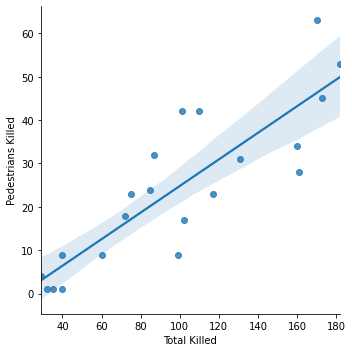

In [50]:
sns.lmplot(x= "Total Killed", y= "Pedestrians Killed", data = county_crash_scatter) # source in bokeh

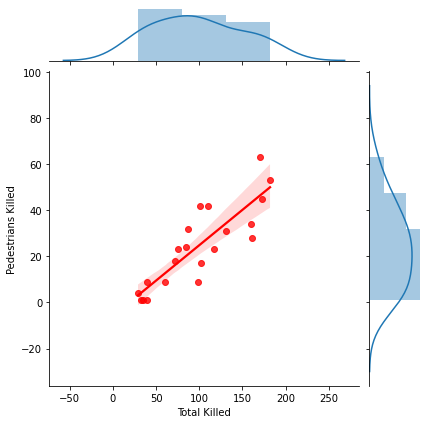

In [53]:
import matplotlib.pyplot as plt

sns.jointplot(x = "Total Killed",
              y = "Pedestrians Killed",
              data = county_crash_scatter,
              kind = "reg",
              joint_kws = {"color":"red"})

# plt.ylim(0, 70)
# plt.xlim(0, 180)

### `Line Chart`

> Let's see the number of New Jersey car crashes over time (2008-2013)

In [54]:
crash_by_date_line

,Crash Date,County Name
0,2008-01-01,575
1,2008-01-02,716
2,2008-01-03,830
3,2008-01-04,906
4,2008-01-05,674
...,...,...
1456,2011-12-27,589
1457,2011-12-28,369
1458,2011-12-29,429
1459,2011-12-30,483


In [55]:
crash_by_date_line["Crash Date"] = pd.to_datetime(crash_by_date_line["Crash Date"])

In [56]:
line = figure(title = "The Number of New Jersey Car Crashes over time (2008-2013)",
              x_axis_type = "datetime",
              plot_width = 800,
              plot_height = 600)

line.line(crash_by_date_line["Crash Date"],
          crash_by_date_line["County Name"],
          line_color = "purple",
          line_width = 1)

line.yaxis.axis_label = "County Name"
line.xaxis.axis_label = "Crash Date"
line.xaxis.major_label_orientation = "vertical"

output_file("timeseries.html")

show(line)

> `Thank you for working with the script :)`

In [ ]:
exit()